In [1]:
using FastGaussQuadrature
using LinearAlgebra
using DifferentialEquations
using NLsolve
using Printf
using SparseArrays
# using ModelingToolkit
using BenchmarkTools
using Statistics
using CairoMakie
using LinearAlgebra
using LaTeXStrings
using ForwardDiff
using Optim
using Polynomials
using Noise
using Random
using NumericalIntegration

In [2]:
#################################################################
#  Set of 4 Figure Themes for Makie/CairoMakie                  #
#################################################################

#################################################################
#  Defaults for linear axes x,y plots                           #
#################################################################

theme_linear = Theme(    
    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),
    
    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = false,
        xminorgridvisible  = false,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = false,
        yminorgridvisible  = false,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log-log axes x,y plots                          #
#################################################################

theme_log = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log x/linear y plots                            #
#################################################################

theme_logx = Theme(    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for linear x/log y plots                            #
#################################################################

theme_logy = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)
;

In [3]:
CairoMakie.activate!(type = "svg")

In [4]:
P      = 1.0            #bar
P0     = 1.0            #bar
MC     = 10.0           #grams of catalyst in reactor
NS0    = 10.0           #moles of active sites
FAf    = 1              #mol/s
FBf    = 2              #mol/s
FCf    = 0              #mol/s
FIf    = 1000           #mol/s
FAf_S  = FAf/NS0        #mol/s/mol active site
FBf_S  = FBf/NS0        #mol/s/mol active site
FCf_S  = FCf/NS0        #mol/s/mol active site
FIf_S  = FIf/NS0        #mol/s/mol active site
R      = 8.314 #J/mol/K
kb     = 1.380649e-23 #J/K
h      = 6.62607015e-34 #J*s
phi    = 0.5
VR     = 50000.0  #L
VF     = VR*phi #L
VC     = VR*(1-phi) #L
rhoB   = 1.0
rhoS0  = 1.0
kd     = 1e-6 #1/sec

DSACT = [-100, -100, -100, 0, 0]      #J/mol/K
DHACT = [0, 0, 0, 100, 130]*1000      #J/mol
DS    = [-100, -100, -100, 0, 0]      #J/mol/K
DH    = [-100, -100, -100, 0, -40]*1000 #J/mol
sigma = [1, 1, -1, 1, 0]
DHrxn = sum(sigma.*DH) #J/mol
DSrxn = sum(sigma.*DS) #J/mol/K

#Temperature dependent quantities, define each as a function of T to be given as parameter
K(T)     = exp.(DS/R).*exp.(-DH/R/T)
kf(T)    = kb*T/h*exp.(DSACT/R).*exp.(-DHACT/R/T)
kr(T)    = kf(T)./K(T)
Qf(T)    = (FAf + FBf + FCf + FIf)*0.083145*T/P #L/s
tauF(T)  = VF/Qf(T)
DGrxn(T) = DHrxn .- T*DSrxn
Krxn(T)  = exp.(-DGrxn(T)/R/T)
Kck(T)   = K(T)[1]*K(T)[2]/K(T)[3]*K(T)[4]
TC(T)    = 1 - Krxn(T)/Kck(T);

**Modelling a CSTR (or differential PBR) with catalyst deactivation**

Now that we have a transient model, we can build in catalyst deactivation. One can imagine a few ways to model catalyst deactivation; choices will depend on mathematical convenience as well as insights into the physical nature of deactivation. We consider two approaches beginning with the usual transient balances on the CSTR (assuming a constant bulk fluid density):

\begin{align}
    \frac{dF_j}{dt} &= \frac{1}{\tau_F}\left(F_{j,f} - F_j + {R_j}^{\prime \prime \prime}N_S\right) \\
    \frac{dN_{j,*}}{dt} &= {R_j}^{\prime \prime \prime}N_S
\end{align}

In the prior two cases, where there was no catalyst deactivation, we normalized balances by the number of active sites since they can be considered time-independent in the absence of deactivation or induction phenomena. Now, we consider the case of deactivation, where our observed activity is clearly time dependent, and the accessible active surface area is clearly changing with respect to time. Therefore, some care is required in how one treats the number of active sites, $N_S$ in the transient balances.

One approach is to say that the number of active sites, $N_S$ is decreasing as a function of time on stream (or increasing in the case of induction), which causes the observed loss in activity. With this approach, one needs a time-domain model that captures the decreasing number of active sites as a function of time on stream. There is probably almost infinite flexibility in how to model catalyst deactivation, and one should generally allow that catalyst deactivation can depend on temperature, pressure, and bulk composition. If one commits to a numercial solution, then it is straightforward to build time, pressure, temperature, and composition dependencies into the deactivation model by including it in the system of coupled ODEs comprising material balances on the various bulk and surface species. In the interest of a tractable example, we find that for many of our experimental systems, the dynamics of catalyst activity are well-described by a decay that is second order in catalyst activity:

$$\frac{da}{dt} = -k_{df}a^2\frac{p_A}{P_0}$$

In this model, the "activity", $a$ is defined as the rate at a given time on stream normalized by the rate at zero time on stream.  At zero time on stream, the activity is 1. This is a useful empirical model that has been applied in describing the loss of activity due to sintering, and we have previously employed it, for example, in describing the loss of activity attributed to particle growth during the aqueous-phase hydrogenation of levulinic acid over Ru. For the purpose of illustration, we show the case where catalyst deactivation is also dependent on system composition. In this case, the deactivation model cannot be decoupled from the material balances, so it must be solved numerically and simultaneously with the material balances.

In our dynamic material balances, the extensive production rate for species depends on the number of active sites, $N_S$. Assuming that the activity of the catalyst scales directly with the number of active sites, one could describe the number of active sites at a given time on stream, $N_S$, as a function of the activity, $a$, and the initial number of active sites in the pristine catalyst, $N_{S0}$.

$$N_S = a N_{S0}$$

In order to account for the decay in the number of active sites, one would add the above deactivation model as a differential equation to the ODE system described above for the case of a CSTR without catalyst deactivation. Note that, here, since we have made the decision to treat the number of active sites ($N_S$) as time-variant, we have not normalized the ODEs by the number of active sites, so balances are written in extensive units. 

<br> 
<span style="font-size:1.3em;">

\begin{align}
    \frac{dF_A}{dt} &= \frac{1}{\tau_F}\left(F_{A,f} - F_A + {R_A}^{\prime \prime \prime}N_S\right) \\
    \frac{dF_B}{dt} &= \frac{1}{\tau_F}\left(F_{B,f} - F_B + {R_B}^{\prime \prime \prime}N_S\right) \\
    \frac{dF_C}{dt} &= \frac{1}{\tau_F}\left(F_{C,f} - F_C + {R_P}^{\prime \prime \prime}N_S\right) \\
    \frac{dN_{A_*}}{dt} &= {R_{A_*}}^{\prime \prime \prime}N_S \\
    \frac{dN_{B_*}}{dt} &= {R_{B_*}}^{\prime \prime \prime}N_S \\
    \frac{dN_{C_*}}{dt} &= {R_{C_*}}^{\prime \prime \prime}N_S \\
    \frac{da}{dt} &= -k_da^2\frac{p_A}{P_0}\\
    0 &= 1 - \theta_A - \theta_B - \theta_C - \theta_V \\ 
\end{align}

</span>

One would then define the total number of active sites at the current time step in the ODE solution as:

$$N_S = aN_{S0}$$

And the coverage for species $j$ would then be calculated as:

$$\theta_j = \frac{N_{j,*}}{N_S}$$

With vacancies given by the site balance:

$$\theta_V = 1 - \theta_A - \theta_B - \theta_C$$


We express net production rates in terms of elementary reaction rates as usual:

\begin{align}
    {R_A}^{\prime \prime \prime} &= -r_1 \\
    {R_B}^{\prime \prime \prime} &= -r_2 \\
    {R_P}^{\prime \prime \prime} &= -r_3 \\
    {R_{A_*}}^{\prime \prime \prime} &= r_1 - r_4 \\
    {R_{B_*}}^{\prime \prime \prime} &= r_2 - r_4 \\
    {R_{C_*}}^{\prime \prime \prime} &= r_3 + r_4 \\
\end{align}

And elementary rate expressions are given as functions of activities and coverages.

\begin{align}
    {r_1}^{\prime \prime \prime} &= k_1a_A\theta_* - k_{-1}\theta_A \\
    {r_2}^{\prime \prime \prime} &= k_2a_B\theta_* - k_{-2}\theta_B \\
    {r_3}^{\prime \prime \prime} &= k_3a_C\theta_* - k_{-3}\theta_C \\
    {r_4}^{\prime \prime \prime} &= k_4\theta_A\theta_B - k_{-4}\theta_C\theta_* \\
\end{align}

The solution to this system is presented below.

In [5]:
function tCSTRd1!(du, u, p, t)
    #Unpack parameters
    FAf, FBf, FCf, FIf, T, P, P0, NS0, kd = p
    
    #Relabel state variables
    FA  = u[1]    #Flowrate of A, extensive, moles/s
    FB  = u[2]    #Flowrate of B, extensive, moles/s
    FC  = u[3]    #Flowrate of C, extensive, moles/s
    NAs = u[4]    #Number of A surface species, moles
    NBs = u[5]    #Number of B surface species, moles
    NCs = u[6]    #Number of C surface species, moles
    a   = u[7]    #introduced new state variable to describe the current activity of the catalyst
    
    #Calculate current number of active sites at time step t
    NS  = NS0*a
    
    #Calculate coverages based on the current number of active sites
    tA  = NAs/NS
    tB  = NBs/NS
    tC  = NCs/NS
    
    #Calculate vacancies from site balance
    tV  = 1 - tA - tB - tC
    
    #Calculate total molar flowrate of gases
    FT  = FA + FB + FC + FIf #mol/s
    
    #Mole fractions
    yA  = FA/FT
    yB  = FB/FT
    yC  = FC/FT
    
    #Thermodynamic activities
    aA  = yA*P/P0
    aB  = yB*P/P0
    aC  = yC*P/P0
    
    #Calculate rate constants at system temperature
    k1f, k2f, k3f, k4f, k5f = kf(T)
    k1r, k2r, k3r, k4r, k5r = kr(T)
    
    #Elementary reaction rates in TOF units
    r1 = k1f*aA*tV - k1r*tA
    r2 = k2f*aB*tV - k2r*tB
    r3 = k3f*aC*tV - k3r*tC
    r4 = k4f*tA*tB - k4r*tC*tV
    
    #Production rates, TOF units
    RA  = -r1
    RB  = -r2
    RC  = -r3
    RAs =  r1 - r4
    RBs =  r2 - r4
    RCs =  r3 + r4

    #Specify material balances for each bulk species and surface species; include deactivation model    
    du[1] = 1/tauF(T)*(FAf - FA + RA*NS) #Balance on A, dFA/dt [=] moles/s/s
    du[2] = 1/tauF(T)*(FBf - FB + RB*NS) #Balance on B, dFB/dt [=] moles/s/s
    du[3] = 1/tauF(T)*(FCf - FC + RC*NS) #Balance on C, dFC/dt [=] moles/s/s
    du[4] = RAs*NS     #Balance on A*, dNAs/dt = moles/s
    du[5] = RBs*NS     #Balance on B*, dNBs/dt = moles/s
    du[6] = RCs*NS     #Balance on C*, dNCs/dt = moles/s
    du[7] = -kd*a^2*aA #Deactivation model, da/dt [=] 1/s
end

tCSTRd1! (generic function with 1 method)

In [6]:
#Wrap solution to ODE system in a function as usual

function tCSTRd1main(par)
    FAf, FBf, FCf, FIf, T, P, P0, NS0, kd = par
    domainfunc = (u,p,t) -> any(x -> x < 0, u)
    u0 = [0., 0., 0., 0., 0., 0., 1.]
    tspan = (0.0, 1e13)
    tvals = 10 .^range(-12, stop = 13, length = 2000)
    prob = ODEProblem(tCSTRd1!, u0, tspan, par)
    tCSTRsol = solve(prob, Rodas4(), abstol = 1e-10, reltol = 1e-10, isoutofdomain = domainfunc, dtmin = 1e-18)
    #display(@benchmark solve($prob, Rosenbrock23(), isoutofdomain = $domainfunc, saveat = $tvals))
    tCSTRout  = tCSTRsol(tvals)
    FA    = tCSTRout[1,:]
    FB    = tCSTRout[2,:]
    FC    = tCSTRout[3,:]
    NAs   = tCSTRout[4,:]
    NBs   = tCSTRout[5,:]
    NCs   = tCSTRout[6,:]
    a     = tCSTRout[7,:]
    NS    = NS0*a

    XA    = (FAf .- FA)/FAf
    
    tA = NAs./NS
    tB = NBs./NS
    tC = NCs./NS
    tV = 1 .- tA .- tB .- tC
    return tvals, FA, FB, FC, XA, NS, tA, tB, tC, tV
end

tCSTRd1main (generic function with 1 method)

In [7]:
T      = 298
par0   = [FAf, FBf, FCf, FIf, T, P, P0, NS0, kd]
tCSTRd1_tvals, tCSTRd1_FA, tCSTRd1_FB, tCSTRd1_FC, tCSTRd1_XA, tCSTRd1_NS, tCSTRd1_tA, tCSTRd1_tB, tCSTRd1_tC, tCSTRd1_tV = tCSTRd1main(par0);

In [8]:
set_theme!(theme_log)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 1e-2, 1e8)
CairoMakie.xlims!(ax1, 1e-12, 1e6)
CairoMakie.ylims!(ax2, 1e-2, 1e8)
CairoMakie.xlims!(ax2, 1e-12, 1e6)
ax1.xlabel = "time (s)"
ax1.ylabel = "F (mol/s)"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = CairoMakie.lines!(tCSTRd1_tvals/1e6, tCSTRd1_FA*1e6, label = L"F_A", color = :red, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd1_tvals/1e6, tCSTRd1_FB*1e6, label = L"F_B", color = :blue, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd1_tvals[tCSTRd1_FC .> 0]/1e6, tCSTRd1_FC[tCSTRd1_FC .> 0]*1e6, label = L"F_C", color = :black, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(tCSTR_tvals[tCSTR_FC_S .> 0]/1e6, tCSTR_FC_S[tCSTR_FC_S .> 0]*1e6, label = L"F_C", color = :black, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.scatter!(tCSTR_tvals/1e6, tCSTR_FC_S*1e6, marker = :circle, markersize = 13, strokewidth = 1.25, strokecolor = :blue, color = :white)
#pl1  = CairoMakie.lines!(log.(CA), f1.(log.(CA)), color = :black, linestyle = :dash, linewidth = 1.5)
axislegend(position = :lt, framevisible = true)

fig1
save("dCSTR1.svg", fig1)

CairoMakie.Screen{SVG}


In [9]:
set_theme!(theme_log)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 1e-8, 100)
CairoMakie.xlims!(ax1, 1e-12, 1e6)
CairoMakie.ylims!(ax2, 1e-8, 100)
CairoMakie.xlims!(ax2, 1e-12, 1e6)

ax1.xlabel = "time (s)"
ax1.ylabel = L"\theta"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = CairoMakie.lines!(tCSTRd1_tvals[tCSTRd1_tA .> 0]/1e6, tCSTRd1_tA[tCSTRd1_tA .> 0], label = L"\theta_A", color = :red, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd1_tvals[tCSTRd1_tB .> 0]/1e6, tCSTRd1_tB[tCSTRd1_tB .> 0], label = L"\theta_B", color = :blue, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd1_tvals[tCSTRd1_tC .> 0]/1e6, tCSTRd1_tC[tCSTRd1_tC .> 0], label = L"\theta_C", color = :black, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd1_tvals[tCSTRd1_tV .> 0]/1e6, tCSTRd1_tV[tCSTRd1_tV .> 0], label = L"\theta_V", color = :green, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(log.(CA), f1.(log.(CA)), color = :black, linestyle = :dash, linewidth = 1.5)
axislegend(position = :rb, framevisible = true)

fig1
save("dCSTR2.svg", fig1)

CairoMakie.Screen{SVG}


**A different perspective**

An alternative approach is to consider that the number of active sites in the reactor is actually constant, i.e., $N_S$ is time independent, but that there is accumulation of an inhibitor on the surface that reduces the coverage of reacting species. This is perhaps the more realistic interpretation for cases of deactivation that do not involve restructuring (e.g., sintering), but instead involve the accumulation of inhibitors (e.g., poisons, coke, inert spectators, etc.) on the catalyst surface.  In these cases, the number of active sites does not change, but their accessibility does, and one would observe a decrease in turnover frequency, which would be attributed to a decrease in coverage of reaction intermediates.

We begin as usual with the transient material balances:

\begin{align}
    \frac{dF_j}{dt} &= \frac{1}{\tau_F}\left(F_{j,f} - F_j + {R_j}^{\prime \prime \prime}N_S\right) \\
    \frac{dN_{j,*}}{dt} &= {R_j}^{\prime \prime \prime}N_S
\end{align}

In this case, we say that the number of active sites, $N_S$ remains constant as a function of time on stream, but their accessibility changes due to the accumulation of inhibitors, and this causes a decrease in the observed rate of reaction. With this approach, one needs a time-domain model that captures the increasing fractional coverage of inhibitors as a function of time on stream. Again, there is considerable flexibility in how one might do this, and it is relatively straightforward to incorporate even complex models into the ODE systems that describe transient behavior in a CSTR. 

Our approach is to introduce additional elementary steps that describe the accumulation of inhibitors on the surface.  This is a reasonable model for catalyst poisons or for carbon deposition.  Here we'll consider the case where adsorbed species A converts to a non-reactive inhibitor, *I*. In this model, *I* has the sole function of competitively binding at active sites.

    
**Mechanism with Inhibitor Accumulation**

\begin{align}
    A + * &\rightleftharpoons A_* \\
    B + * &\rightleftharpoons B_* \\
    C + * &\rightleftharpoons C_* \\
    A_* + B_* &\rightleftharpoons C_* + * \\
    A_* &\rightleftharpoons I_* \\
\end{align}

In this model, the kinetics of Inhibitor formation (step 5) determine the time scale over which deactivation is observed.  If the accumulation of inhibitor occurs rapidly relative to reaction steps, deactivation will be invisible, and one will infer an apparently stable steady state turnover frequency that is artificially low due to an unquantified accumulation of inhibitor on the surface.  If the rate of step 5 is slow relative to reaction steps, then deactivation will be observed, and it is possible to infer a true turnover frequency (i.e., for the catalytic cycle without a loss of active surface area due to inhibitor accumulation) from the system. The equilibrium position of step 5 will determine the severity of deactivation observed at steady state.  If the step is irreversible, one anticipates complete deactivation of the catalyst as time approaches infinity, but if it is reversible, this model will predict a non-zero steady state activity.

Since we are restricting ourselves to the case where the number of active sites is constant, we divide the ODEs by the (constant) number of active sites to express everything per unit active site: 

$$\frac{d{F_j}^{\prime \prime \prime}}{dt} = \frac{1}{\tau}\left({F_{j,f}}^{\prime \prime \prime} - {F_j}^{\prime \prime \prime} + {R_j}^{\prime \prime \prime}\right)$$

For surface species:

$$\frac{d\theta_{j}}{dt} = {R_j}^{\prime \prime \prime}$$

We then write material balances on all bulk and surface species--including the inhibitor. We add a site balance so that we can calculate the vacancy coverage. This gives a system of differential and algebraic equations, i.e., a DAE system, written in terms of 8 state variables--the molar flowrates of each bulk species, the coverage of all surface species (including the inhibitor), and the coverage of vacant sites:

<br> 
<span style="font-size:1.25em;">

\begin{align}
    \frac{d{F_A}^{\prime \prime \prime}}{dt} &= \frac{1}{\tau_F}\left({F_{A,f}}^{\prime \prime \prime} - {F_A}^{\prime \prime \prime} + {R_A}^{\prime \prime \prime}\right) \\
    \frac{d{F_B}^{\prime \prime \prime}}{dt} &= \frac{1}{\tau_F}\left({F_{B,f}}^{\prime \prime \prime} - {F_B}^{\prime \prime \prime} + {R_B}^{\prime \prime \prime}\right) \\
    \frac{d{F_C}^{\prime \prime \prime}}{dt} &= \frac{1}{\tau_F}\left({F_{C,f}}^{\prime \prime \prime} - {F_C}^{\prime \prime \prime} + {R_C}^{\prime \prime \prime}\right) \\
    \frac{d\theta_{A}}{dt} &= {R_{A_*}}^{\prime \prime \prime} \\
    \frac{d\theta_{B}}{dt} &= {R_{B_*}}^{\prime \prime \prime} \\
    \frac{d\theta_{C}}{dt} &= {R_{C_*}}^{\prime \prime \prime} \\
    \frac{d\theta_{I}}{dt} &= {R_{I_*}}^{\prime \prime \prime} \\
    0 &= 1 - \theta_A - \theta_B - \theta_C - \theta_I - \theta_V
\end{align}

</span>
    
We solve explictly for vacancies from values of the remaining surface species.

$$\theta_V = 1 - \theta_A - \theta_B - \theta_C - \theta_I$$

We express net production rates in terms of elementary reaction rates:

\begin{align}
    R_A &= -r_1 \\
    R_B &= -r_2 \\
    R_C &= -r_3 \\
    R_{A_*} &= r_1 - r_4 - r_5 \\
    R_{B_*} &= r_2 - r_4 \\
    R_{C_*} &= r_3 + r_4 \\
    R_{I_*} &= r_5 \\
\end{align}

With elementary rate expressions given as functions of thermodynamic activities:

\begin{align}
    r_1 &= k_1a_A\theta_* - k_{-1}\theta_A \\
    r_2 &= k_2a_B\theta_* - k_{-2}\theta_B \\
    r_3 &= k_3a_P\theta_* - k_{-3}\theta_C \\
    r_4 &= k_4\theta_A\theta_B - k_{-4}\theta_C\theta_* \\
    r_5 &= k_5\theta_A         - k_{-5}\theta_I \\
\end{align}

In [10]:
#Define the ODE system in a function with in place updating

function tCSTRd3!(du, u, p, t)
    #Unpack parameters
    FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0  = p
    
    #Relabel state variables
    FA_S = u[1]  #Molar flowrate of A, intensive [=] mol/s/mol sites
    FB_S = u[2]  #Molar flowrate of B, intensive [=] mol/s/mol sites
    FC_S = u[3]  #Molar flowrate of C, intensive [=] mol/s/mol sites
    tA   = u[4]  #Coverage of A*
    tB   = u[5]  #Coverage of B*
    tC   = u[6]  #Coverage of C*
    tI   = u[7]  #Coverage of I*
    
    #Calculate vacancies from the site balance
    tV   = 1 - tA - tB - tC - tI
    
    #Total gas molar flowrate
    FT_S   = FA_S + FB_S + FC_S + FIf_S #mol/s/mol sites
    
    #Mole fractions
    yA     = FA_S/FT_S
    yB     = FB_S/FT_S
    yC     = FC_S/FT_S
    
    #Thermodynamic activities
    aA     = yA*P/P0
    aB     = yB*P/P0
    aC     = yC*P/P0
    
    #Calculate rate constants at system temperature
    k1f, k2f, k3f, k4f, k5f = kf(T)
    k1r, k2r, k3r, k4r, k5r = kr(T)
    
    #Reaction rates in TOF units
    r1 = k1f*aA*tV - k1r*tA
    r2 = k2f*aB*tV - k2r*tB
    r3 = k3f*aC*tV - k3r*tC
    r4 = k4f*tA*tB - k4r*tC*tV
    r5 = k5f*tA    - k5r*tI

    #Production rates in TOF units
    RA     = -r1
    RB     = -r2
    RC     = -r3
    RAs    =  r1 - r4 - r5
    RBs    =  r2 - r4
    RCs    =  r3 + r4
    RIs    =  r5
    
    #ODE system comprising material balances on bulk and surface species
    du[1]  = 1/tauF(T)*(FAf_S - FA_S + RA) #Balance on A, dFA_S/dt [=] mol/s/mol site/s
    du[2]  = 1/tauF(T)*(FBf_S - FB_S + RB) #Balance on B, dFB_S/dt [=] mol/s/mol site/s
    du[3]  = 1/tauF(T)*(FCf_S - FC_S + RC) #Balance on C, dFC_S/dt [=] mol/s/mol site/s
    du[4]  = RAs   #Balance on A* dϑA [=] mol/s/mol site
    du[5]  = RBs   #Balance on B* dϑB [=] mol/s/mol site
    du[6]  = RCs   #Balance on C* dϑC [=] mol/s/mol site
    du[7]  = RIs   #Balance on I* dϑI [=] mol/s/mol site
end

tCSTRd3! (generic function with 1 method)

In [11]:
#Wrap solver in a funciton

function tCSTRd3main(par)
    FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0  = par
    domainfunc = (u,p,t) -> any(x -> x < 0, u)
    u0 = [0., 0., 0., 0., 0., 0., 0.]
    tspan = (0.0, 1e13)
    prob = ODEProblem(tCSTRd3!, u0, tspan, par)
    tvals = 10 .^range(-12, stop = 13, length = 2000)
    tCSTRsol = solve(prob, Rodas5(), abstol = 1e-10, reltol = 1e-10, isoutofdomain = domainfunc, saveat = tvals, dtmin = 1e-18)
    #display(@benchmark solve($prob, Rosenbrock23(), isoutofdomain = $domainfunc, saveat = $tvals))
    tCSTRout   = tCSTRsol(tvals)

    FA_S = tCSTRout[1,:]
    FB_S = tCSTRout[2,:]
    FC_S = tCSTRout[3,:]
    tA   = tCSTRout[4,:]
    tB   = tCSTRout[5,:]
    tC   = tCSTRout[6,:]
    tI   = tCSTRout[7,:]
    tV   = 1 .- tA .- tB .- tC .- tI
    XA   = (FAf_S .- FA_S)/FAf_S
    
    return tvals, FA_S, FB_S, FC_S, XA, tA, tB, tC, tI, tV
end

tCSTRd3main (generic function with 1 method)

In [12]:
T      = 298
par0   = [FAf_S, FBf_S, FCf_S, FIf_S, T, P, P0]
tCSTRd3_tvals, tCSTRd3_FA_S, tCSTRd3_FB_S, tCSTRd3_FC_S, tCSTRd3_XA, tCSTRd3_tA, tCSTRd3_tB, tCSTRd3_tC, tCSTRd3_tI, tCSTRd3_tV = tCSTRd3main(par0);

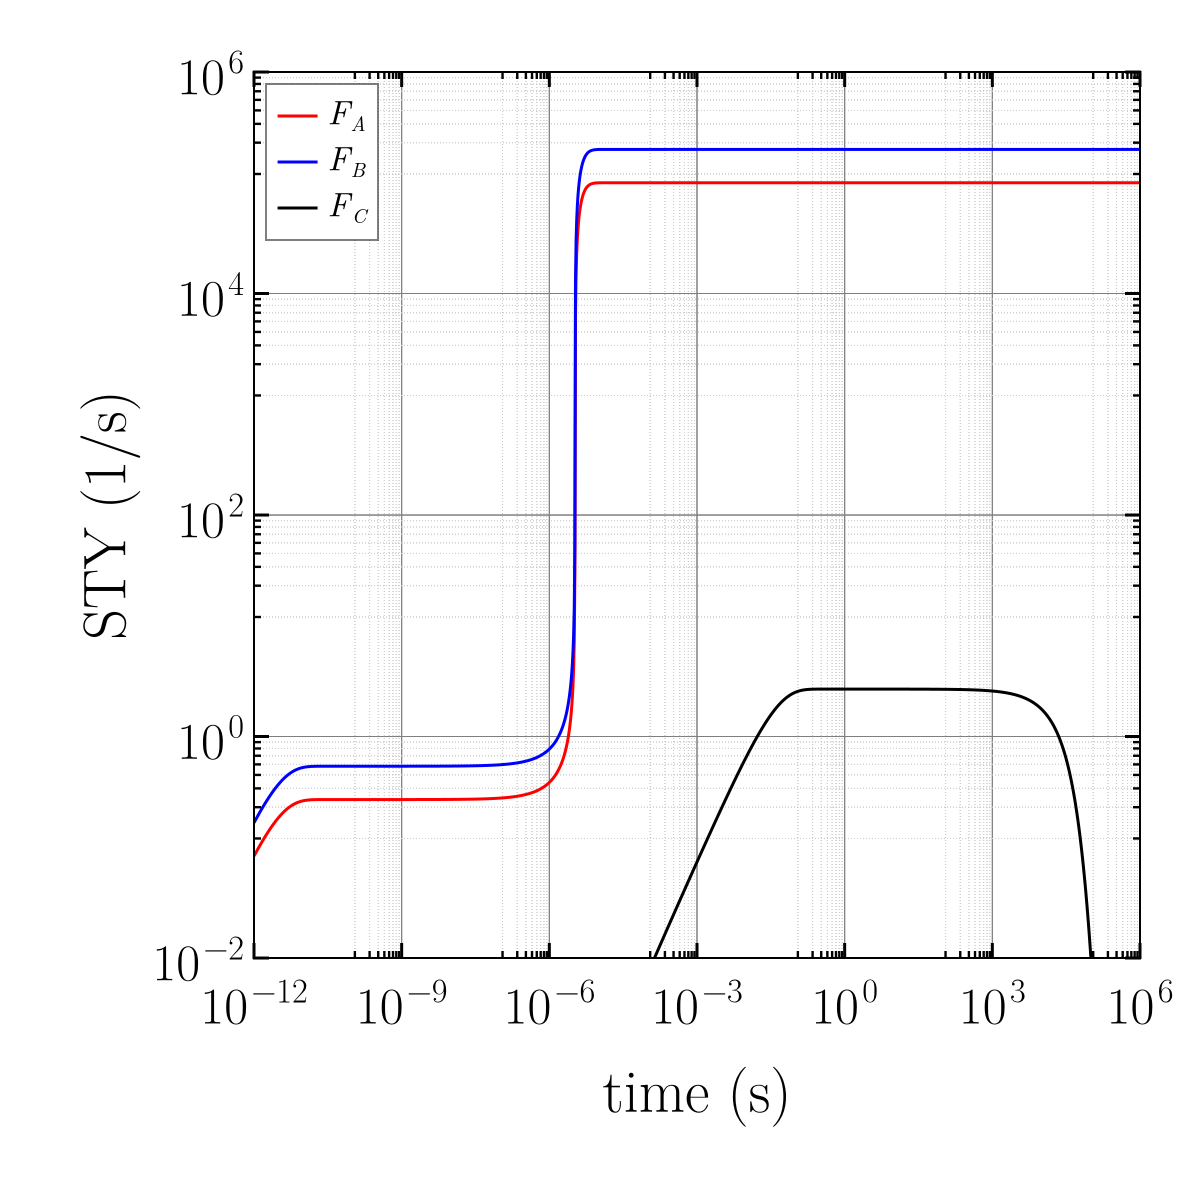

In [13]:
set_theme!(theme_log)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 1e-2, 1e6)
CairoMakie.xlims!(ax1, 1e-12, 1e6)
CairoMakie.ylims!(ax2, 1e-2, 1e6)
CairoMakie.xlims!(ax2, 1e-12, 1e6)

ax1.xlabel = "time (s)"
ax1.ylabel = "STY (1/s)"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = CairoMakie.lines!(tCSTRd3_tvals/1e6, tCSTRd3_FA_S*1e6, label = L"F_A", color = :red, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd3_tvals/1e6, tCSTRd3_FB_S*1e6, label = L"F_B", color = :blue, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd3_tvals[tCSTRd3_FC_S .> 0]/1e6, tCSTRd3_FC_S[tCSTRd3_FC_S .> 0]*1e6, label = L"F_C", color = :black, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.lines!(tCSTR_tvals[tCSTR_FC_S .> 0]/1e6, tCSTR_FC_S[tCSTR_FC_S .> 0]*1e6, label = L"F_C", color = :black, linestyle = :solid, linewidth = 1.5)
#pl1  = CairoMakie.scatter!(tCSTR_tvals/1e6, tCSTR_FC_S*1e6, marker = :circle, markersize = 13, strokewidth = 1.25, strokecolor = :blue, color = :white)
#pl1  = CairoMakie.lines!(log.(CA), f1.(log.(CA)), color = :black, linestyle = :dash, linewidth = 1.5)
axislegend(position = :lt, framevisible = true)

fig1
#save("dCSTR3.svg", fig1)

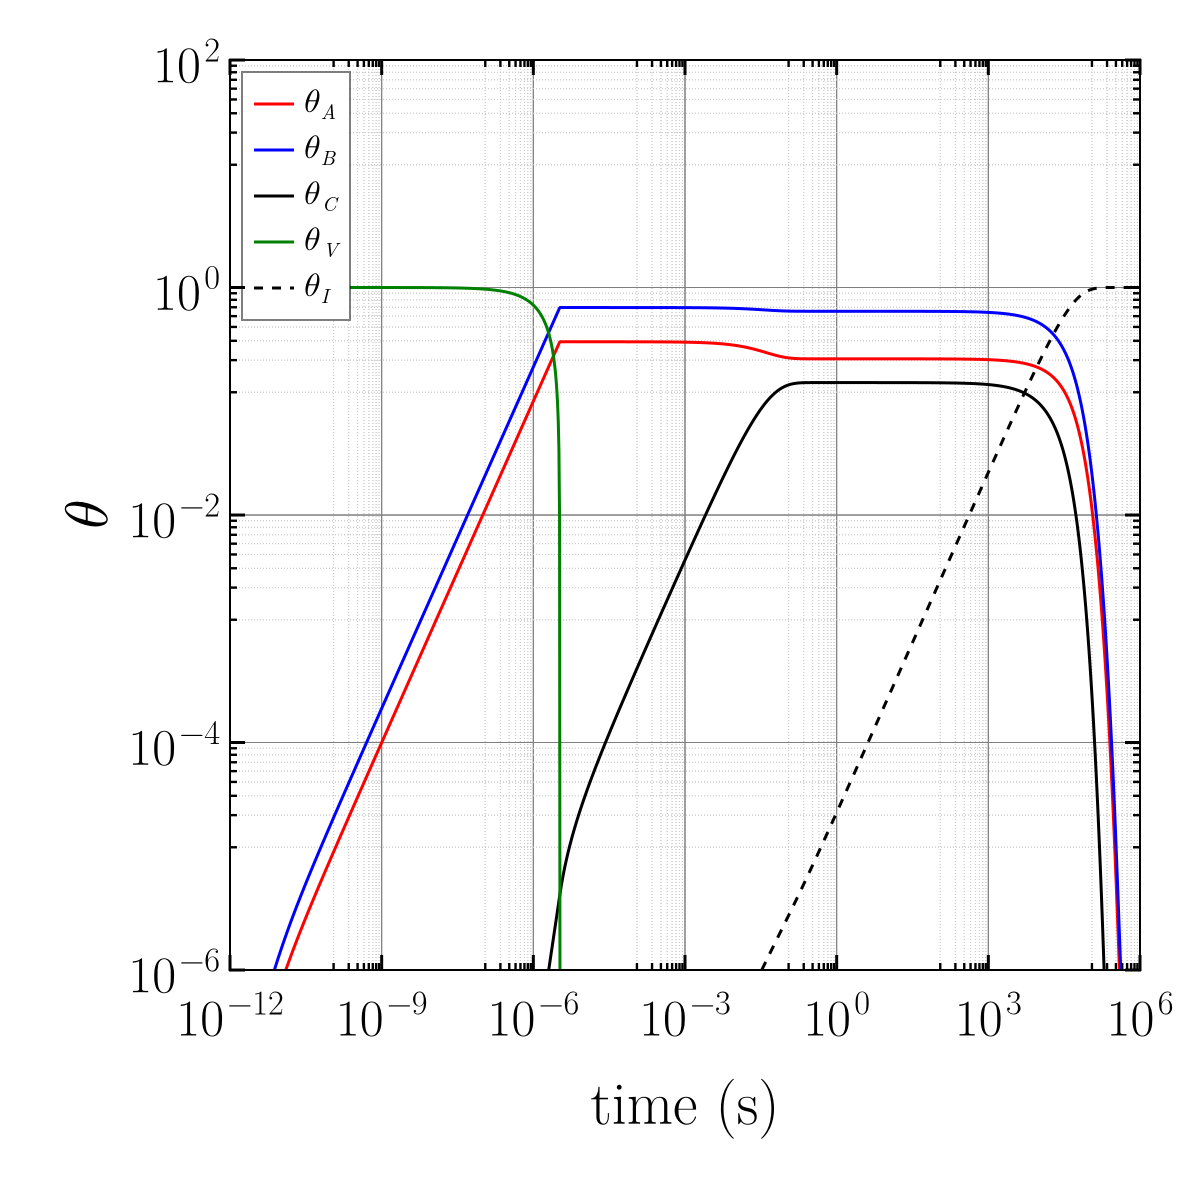

In [14]:
set_theme!(theme_log)

fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

CairoMakie.ylims!(ax1, 1e-6, 1e2)
CairoMakie.xlims!(ax1, 1e-12, 1e6)
CairoMakie.ylims!(ax2, 1e-6, 1e2)
CairoMakie.xlims!(ax2, 1e-12, 1e6)

ax1.xlabel = "time (s)"
ax1.ylabel = L"\theta"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

pl1  = CairoMakie.lines!(tCSTRd3_tvals[tCSTRd3_tA .> 0]/1e6, tCSTRd3_tA[tCSTRd3_tA .> 0], label = L"\theta_A", color = :red, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd3_tvals[tCSTRd3_tB .> 0]/1e6, tCSTRd3_tB[tCSTRd3_tB .> 0], label = L"\theta_B", color = :blue, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd3_tvals[tCSTRd3_tC .> 0]/1e6, tCSTRd3_tC[tCSTRd3_tC .> 0], label = L"\theta_C", color = :black, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd3_tvals[tCSTRd3_tV .> 0]/1e6, tCSTRd3_tV[tCSTRd3_tV .> 0], label = L"\theta_V", color = :green, linestyle = :solid, linewidth = 1.5)
pl1  = CairoMakie.lines!(tCSTRd3_tvals[tCSTRd3_tI .> 0]/1e6, tCSTRd3_tI[tCSTRd3_tI .> 0], label = L"\theta_I", color = :black, linestyle = :dash, linewidth = 1.5)
#pl1  = CairoMakie.lines!(log.(CA), f1.(log.(CA)), color = :black, linestyle = :dash, linewidth = 1.5)
axislegend(position = :lt, framevisible = true)

fig1
#save("dCSTR4.svg", fig1)